<a href="https://colab.research.google.com/github/Mokrytskyi/PyTorch/blob/main/01_model_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

### 1. Data (preparing and loading)

# Data can be almost anything... in machine learning
# * Excel speadsheet
# * Images of any kind
# * Videos (YouTube has lots of data...)
# * DNA ()
# * Text

# Machine learning is a game of two parts:
# 1. Get data into a numerical representation
# 2. Build a model to learn patterns in that numerical representation

# To showcase this, let's create some *known* data using the linear regression formula. ( Y = bX + a )
# We'll use a linear regression formula to make a straight line with *known* **parameters**

# Create *known* parameters
weight = 0.7
bias = 0.3
 
#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)

y = weight * X + bias

print(f"X : {X[:10]}")
print(f"y : {y[:10]}")
print(len(X), len(y))

X : tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
y : tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
50 50


In [ ]:
# Splitting data into training and test sets (one of the most important concepts in machine learning in genearal)
#Let's create a training and test set with our data

#Create a train/test split
train_split = int(0.8 * len(X)) #80% from X
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:] # here ex. X[train_split:] means all after trainsplit , in our case 20%
print(len(X_train),len(y_train),len(X_test),len(y_test))

40 40 10 10


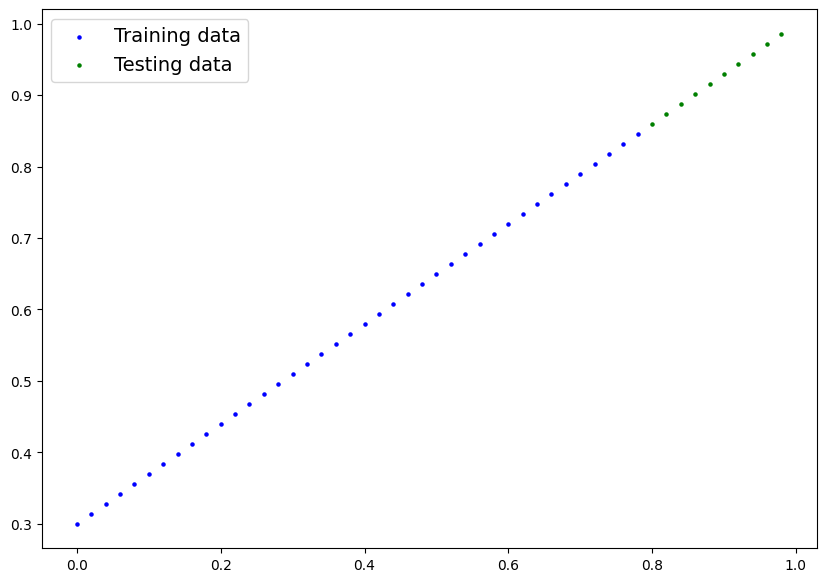

In [ ]:
# How might we better visualize our data?
# This is where the data explorer's motto comes in!
# "Visualize, visualize , visualize!"

import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
					 train_labels=y_train,
					 test_data=X_test,
					 test_labels=y_test,
					 predictions=None):
	"""Plots training data , test data and compares presictions"""
	plt.figure(figsize=(10,7))

	# Plot training data in blue
	plt.scatter(train_data,train_labels,c="b",s=5,label="Training data")

	# Plot test data in green
	plt.scatter(test_data,test_labels,c="g",s=5,label="Testing data")

	#Are there predictions?
	if predictions is not None:
		# PLot the predictions if they exist
		plt.scatter(test_data,predictions,c="r",s=5,label="Predictinos data")
	#Show the legend
	plt.legend(prop={"size":14})

plot_predictions()

In [ ]:
### 2. Build model
# My first PyTorch model
# it is really interesting ...

########################################################################################################
# What our model does:
# * Strart with random values (weight & bias)
# * Look at training data and adjust the random values to better represent (or get closer to) the ideal 
# values (the weight & bias values we used to create the data)
########################################################################################################

###############################
# How does it do so?

# Throught two main algorithms:
# 1. Gradient descent
# 2. Backpropagation
###############################


import torch
from torch import nn

class LinearRegressionModel(nn.Module):

	def __init__(self):
		super().__init__()
		self.weights = nn.Parameter(torch.randn(1,
												requires_grad=True,
												dtype=torch.float32))

		self.bias = nn.Parameter(torch.randn(1,
											 requires_grad=True,
											 dtype=torch.float32))
 
	def forward(self, x: torch.Tensor) -> torch.Tensor:
		return self.weights * x + self.bias

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()
#Check out the parameters
print(list(model_0.parameters()))


[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using 'torch.inference_mode()'

To check our model's predictive power, let's see how well it predicts 'y_test' based on 'X_test'.

When we pass data through our model, it's going to run it through the 'forward()' method.

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_predc = model_0(X_test)

# You can also do something similar with torch.no_grad(), howewer , torch.inference_mode() is prefered
with torch.no_grad():
  y_predc = model_0(X_test)

y_predc

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

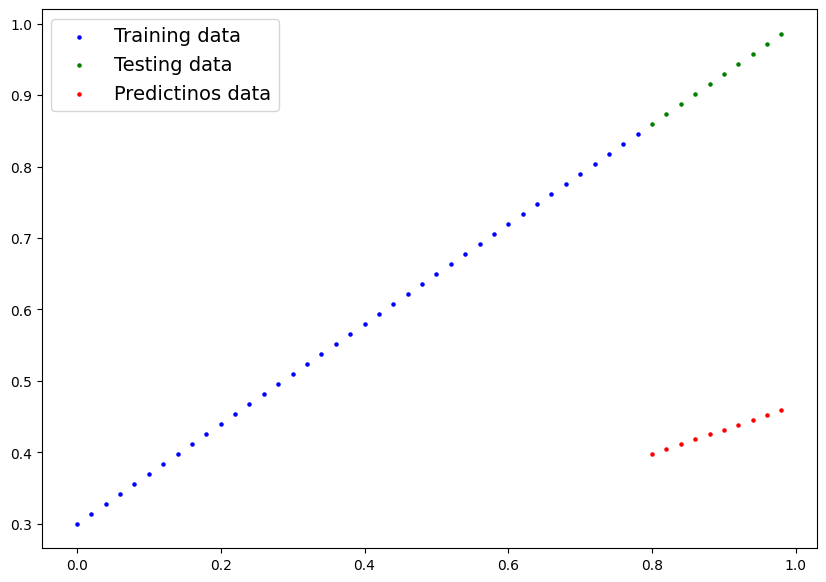

In [ ]:
plot_predictions(predictions=y_predc)

### 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters(these may be random) to some known paraeters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure or how wrong your preddictions are is to use a loss function

* Note: loss function may also be called cost function or criterion in different areas, in our case we are going to it as a loss function

Things we need to train:

* **Loss function:** A function to measure how wrong your model's prediction are to the ideal outputs, lower is better
* **Optimizer:** Takes into the loss and adjusts the model's parameters (e.g. weight & bias) to improve the loss function.

And specifically, we need:
* A training loop
* A testing loop

**Inside the optimizer** you'll often have to set two parameters:
* params - the model parameters you'd like to optimize, for example *params=model_0.parameters*
* lr (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a smal *lr* results in small changes, a large *lr* results in large changes)

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.0001) # lr = learning rate = possibly the most important hyperparameter you can set

### Building a Training Loop (And a Testing Loop) in PyTorch

A couple of things we need in a training loop:
0. Look through the data and do ...
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictionss on data. - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [ ]:
# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
torch.manual_seed(42)
epochs = 10000

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs) :
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate a Loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer Zero Grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate throught the loop so.. we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off different things in the model not needed for evaluaiton/testing (dropout/batch borm layers)
  with torch.inference_mode(): # turns off gradient tracking
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate a Loss
    test_loss = loss_fn(test_pred,y_test)

  epoch_count.append(1)
  loss_values.append(loss)
  test_loss_values.append(test_loss)


# Print out what happening

print(f"Epochs : {len(epoch_count)}")
print(f"Test loss : {loss_values[-1]}")
print(f"Loss : {test_loss_values[-1]}")

Epochs : 10000
Test loss : 0.024342099204659462
Loss : 0.056908827275037766


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5789])), ('bias', tensor([0.3509]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8140],
        [0.8256],
        [0.8371],
        [0.8487],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

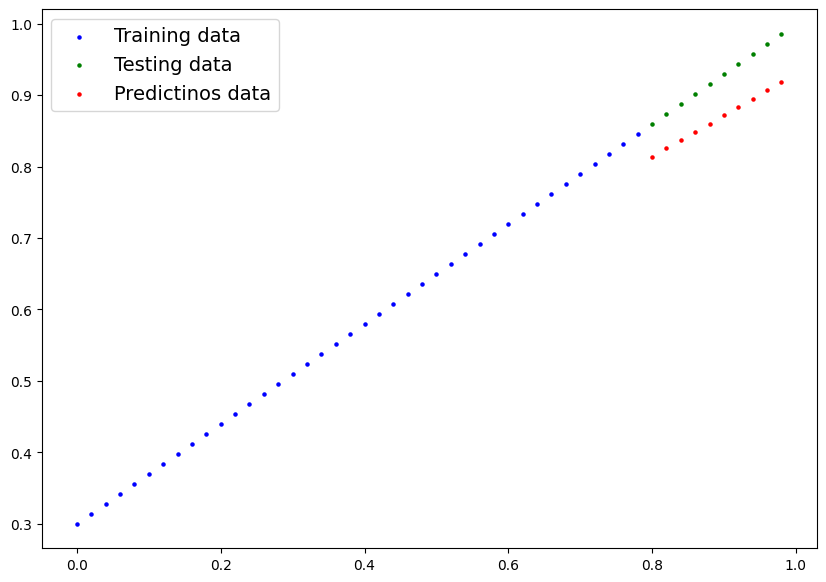

In [ ]:
plot_predictions(predictions=y_preds)

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1.`torch.save()` - allows you save a PyTorch object in Pyton's pickle format

2.`torch.load()` - allows you load a saved PyTorch object

3.`torch.n.Module.load_state_dict()` - this allows you to load a model's saved state deictionary

PyToch save & load code tutorial + extra-curriculum - https://pytorch.org/tutorials/beginner/saving_loading_models.html


In [ ]:
# Saving a model

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that

In [ ]:
# Loading a PyTorch model

# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Make some predicitons with a loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_pred = loaded_model_0(X_test)

loaded_model_pred

tensor([[0.8140],
        [0.8256],
        [0.8371],
        [0.8487],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [ ]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back throught the steps above and see it all in one place.

In [ ]:
# Import PyTorch and Matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Chack PyTorch version
torch.__version__

'2.0.1+cu118'

In [ ]:
#Setup device agnostic code (if you need)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device {device}")

device cuda


### 6.1 Data

In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias

weight = -1
bias = 2

# Create range values
start = 0
end = 5
step = 0.05

# Create X and y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1) # without unsqueeze errors will pop up

y = weight * X + bias

print(len(X),len(y))
X[:10], y[:10]


100 100


(tensor([[0.0000],
         [0.0500],
         [0.1000],
         [0.1500],
         [0.2000],
         [0.2500],
         [0.3000],
         [0.3500],
         [0.4000],
         [0.4500]]),
 tensor([[2.0000],
         [1.9500],
         [1.9000],
         [1.8500],
         [1.8000],
         [1.7500],
         [1.7000],
         [1.6500],
         [1.6000],
         [1.5500]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]
print(len(X_train),len(y_train),len(X_test),len(y_test))

80 80 20 20


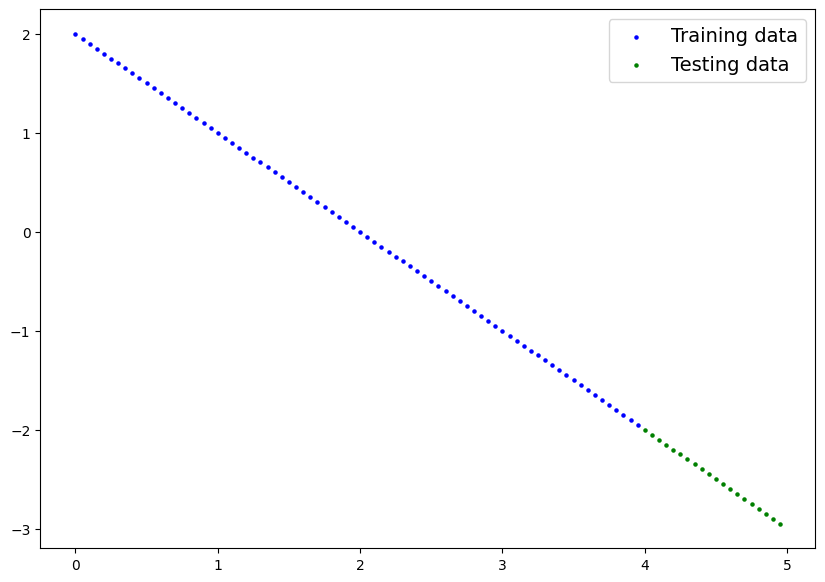

In [ ]:
# Visualizing / Plot the data

plot_predictions(X_train , y_train , X_test , y_test)

## Building a PyTorch Linear model

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called "linear transform"
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
    
  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)

model = LinearRegressionModelV2()

model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
model.to(device)
next(model.parameters()).device

device(type='cuda', index=0)

### 6.3 Training
For training we need:
* Los funciton
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Setup a loss function

loss_fn = nn.L1Loss() # the same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr=0.0001)


In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 100000

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model.train()

  # 1. Forward pass
  y_pred = model(X_train)

  # 2. Calculate the Loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Pefrorm backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)

    test_loss = loss_fn(test_pred , y_test)
  
  # Print out what's happening
  if epoch % 10000 == 0:
    print(f"Epoch: {epoch} / Loss: {loss} / Test_loss: {test_loss}")



Epoch: 0 / Loss: 0.418596088886261 / Test_loss: 0.6567800641059875
Epoch: 10000 / Loss: 0.2640666663646698 / Test_loss: 0.414311021566391
Epoch: 20000 / Loss: 0.10953723639249802 / Test_loss: 0.1718258112668991
Epoch: 30000 / Loss: 0.00043994467705488205 / Test_loss: 1.0561942872300278e-05
Epoch: 40000 / Loss: 0.00043994467705488205 / Test_loss: 1.0561942872300278e-05
Epoch: 50000 / Loss: 0.00043994467705488205 / Test_loss: 1.0561942872300278e-05
Epoch: 60000 / Loss: 0.00043994467705488205 / Test_loss: 1.0561942872300278e-05
Epoch: 70000 / Loss: 0.00043994467705488205 / Test_loss: 1.0561942872300278e-05
Epoch: 80000 / Loss: 0.00043994467705488205 / Test_loss: 1.0561942872300278e-05
Epoch: 90000 / Loss: 0.00043994467705488205 / Test_loss: 1.0561942872300278e-05


In [ ]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.9998]], device='cuda:0')),
             ('linear_layer.bias', tensor([2.0000], device='cuda:0'))])

### 6.4 Making and evaluating predicitons

In [ ]:
# Turn model into evaluation mode
model.eval()
# Make predicitons on the test data
with torch.inference_mode():
  y_preds = model(X_test)
y_preds[:10]
len(y_preds),len(X_test)

(20, 20)

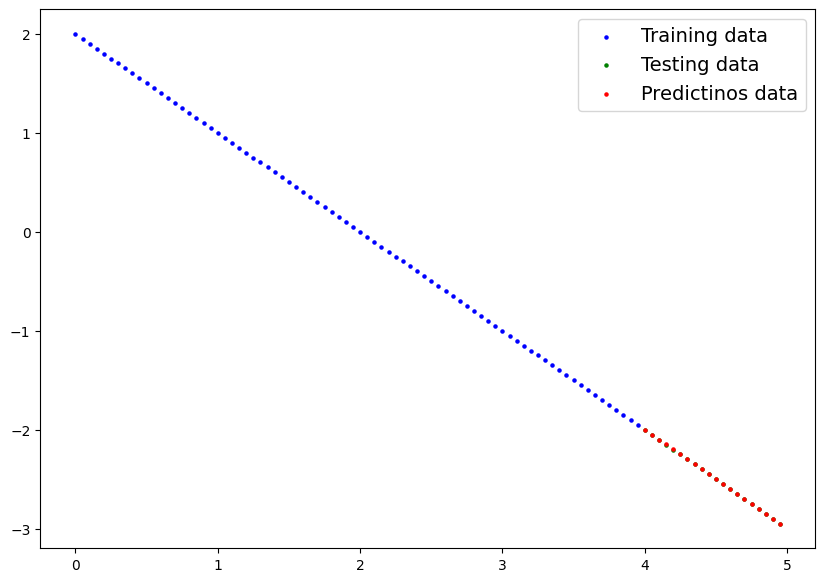

In [ ]:
# Check out our predicitons visually
plot_predictions(X_train.cpu() , y_train.cpu() , X_test.cpu() , y_test.cpu() , predictions = y_preds.cpu())

### 6.5 Saving and loadnig a trained model


In [ ]:
# Saving

from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "02_pytorch_workfow_bigger_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to : models/02_pytorch_workfow_bigger_model.pth


In [53]:
# Loading 

# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model = LinearRegressionModelV2()

# Load the saved state_dict of model
loaded_model.load_state_dict(torch.load(f="models/02_pytorch_workfow_bigger_model.pth"))

# Put the loaded model to device
loaded_model.to(device)

# Make some predicitons with laoded model
loaded_model.eval()
with torch.inference_mode():
  loaded_model_pred = loaded_model(X_test)
loaded_model_pred[:10]

tensor([[-1.9991],
        [-2.0491],
        [-2.0991],
        [-2.1491],
        [-2.1991],
        [-2.2491],
        [-2.2990],
        [-2.3490],
        [-2.3990],
        [-2.4490]], device='cuda:0')

In [58]:
next(loaded_model.parameters()).device

device(type='cuda', index=0)

In [56]:
y_preds[:10] == loaded_model_pred[:10]

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

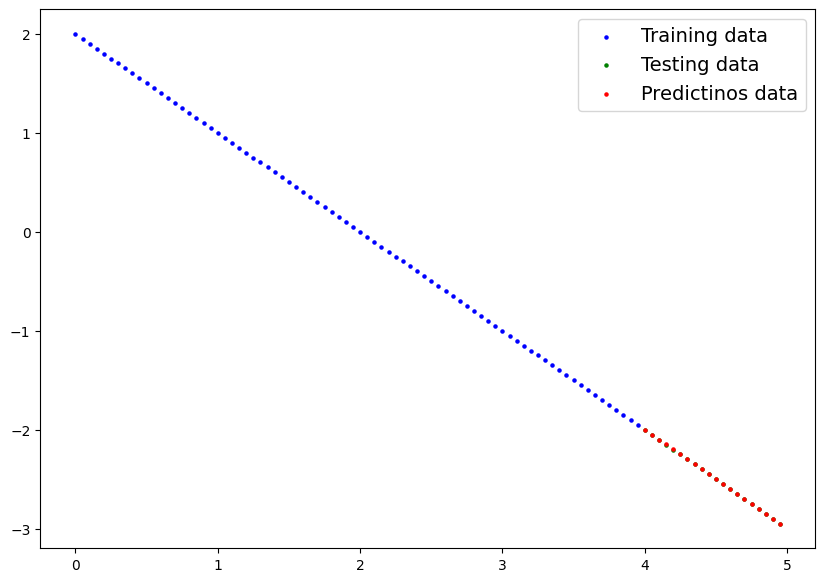

In [60]:
plot_predictions(X_train.cpu() , y_train.cpu() , X_test.cpu() , y_test.cpu() , predictions = loaded_model_pred.cpu())